<a href="https://colab.research.google.com/github/Ashi743/my_projects-/blob/main/customer_clustering_in_a_mall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'customer-segmentation-tutorial-in-python:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F42674%2F74935%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240906%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240906T122918Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D87a4cc56e57a4fd338015a477fa4ddd9d78332df8a39db5e8d6be7bf1e3bf1febdcc400599c8132086aa48b0313becec2b855b96de5a45f5d85b2703c68ed18d51caacaec6b903d57b1218e77cfd6bc99633e026ab0d68377949820e01dc8a8f29da7fc11c8d07452bafa600b76919ef2b280d4adef44d589b6190382d273493b221557fc1fe7a10e48bebd56ed054cd55cd469753636e0f5ea4bda767d10f80345d02523a0786cb34c85db5cdb4e26864e6a3997933a284b39252f3303a207cb4635f6966385c5a328fb44504daf073fb590451214e2814c5af990c7ee3959b8b629cd7e534b423127e7100ea30e21ff554d5183fc31528580a9c7695052e41'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [ ]:
df= pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [ ]:
#essential libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#pip install pandas_profiling

In [ ]:
from pandas_profiling import ProfileReport
#ProfileReport(df)

age vs income

age vs spending

gender vs income

gender vs spending

income vs spending wrt gender

male vs female in mall wrt age  

***Age , Gender relation with Income and spendings***

0.3218425498619055
60.56
61.5


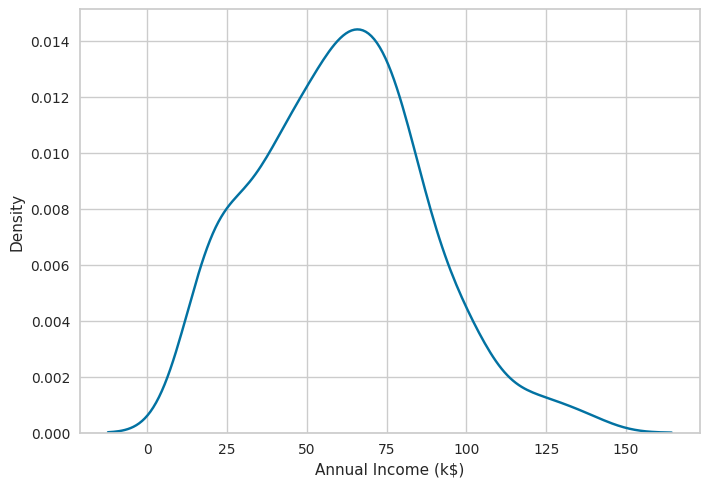

In [ ]:

sns.kdeplot(df , x= "Annual Income (k$)")
print(df["Annual Income (k$)"].skew())
print(df["Annual Income (k$)"].mean())
print(df["Annual Income (k$)"].median())   #gives better insight while some skewness

In [ ]:
#age vs income correlation
#age 18- 70
age_bins = range(15,75,5)

df['Age Group'] = pd.cut(df['Age'], bins=age_bins,  right=False)

# Calculate average income by age group and gender
avg_income = df.groupby(['Age Group', 'Gender'])['Annual Income (k$)'].median().reset_index()
avg_income.head(3)


,Age Group,Gender,Annual Income (k$)
0,"[15, 20)",Female,65.0
1,"[15, 20)",Male,48.0
2,"[20, 25)",Female,35.0


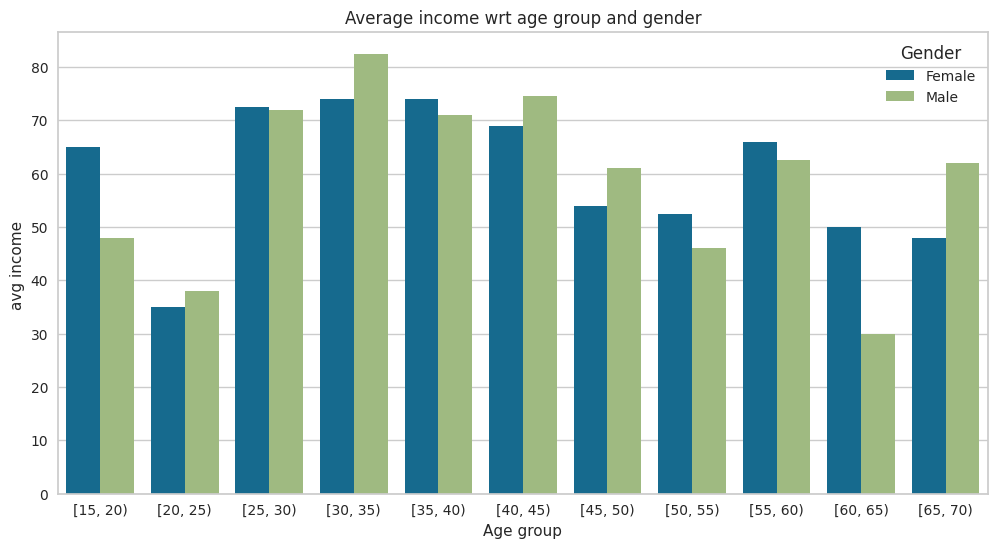

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_income, x="Age Group", y="Annual Income (k$)", hue="Gender")
plt.title("Average income wrt age group and gender")
plt.xlabel("Age group")
plt.ylabel("avg income ")
plt.legend(title="Gender")
plt.show()

people of age 25 to 45 are earning more annually but are they spending too?

-0.047220201374263374
50.2
50.0


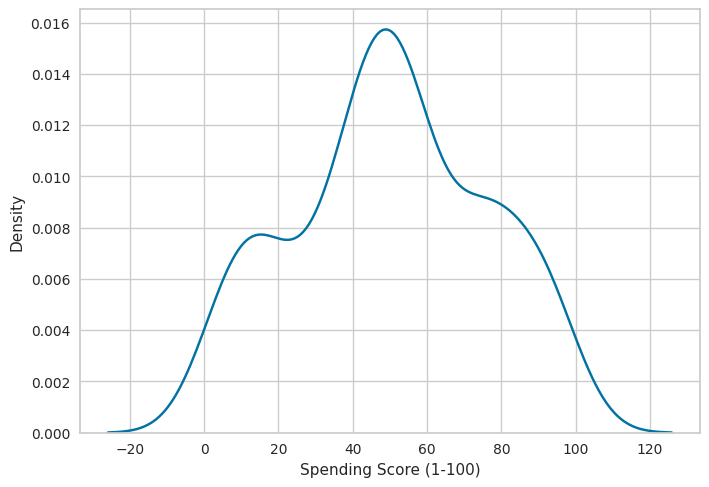

In [ ]:
sns.kdeplot(df["Spending Score (1-100)"])
print(df["Spending Score (1-100)"].skew())
print(df["Spending Score (1-100)"].mean())
print(df["Spending Score (1-100)"].median())
#almost normal dist. use median or mean   but safe side of median

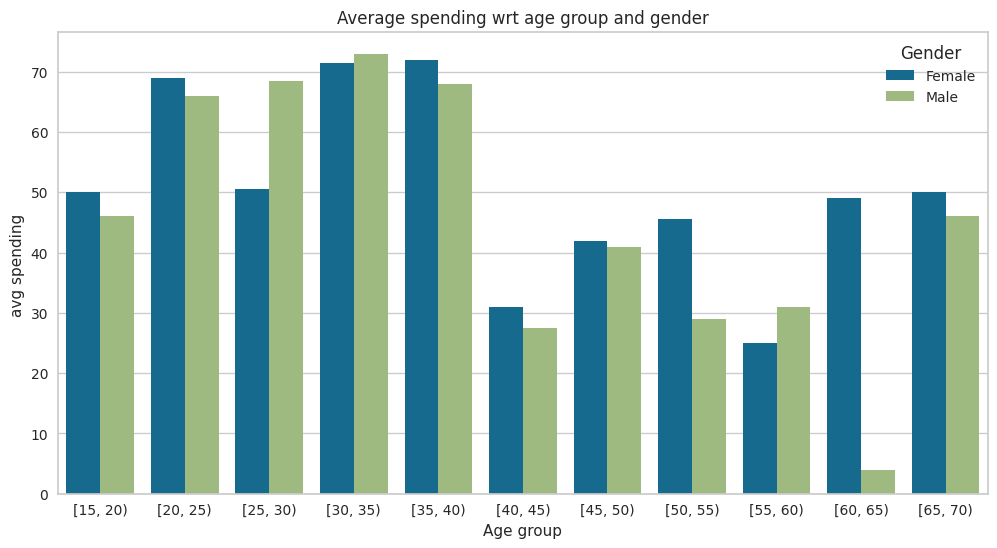

In [ ]:
age_bins = range(15,75,5)

df['Age Group'] = pd.cut(df['Age'], bins=age_bins,  right=False)

# Calculate average income by age group and gender
avg_spending = df.groupby(['Age Group', 'Gender'])['Spending Score (1-100)'].median().reset_index()
avg_spending.head(3)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_spending, x="Age Group", y="Spending Score (1-100)", hue="Gender")
plt.title("Average spending wrt age group and gender")
plt.xlabel("Age group")
plt.ylabel("avg spending ")
plt.legend(title="Gender")
plt.show()

so NO  age group of 20 to 40 are spending more , any correlation?

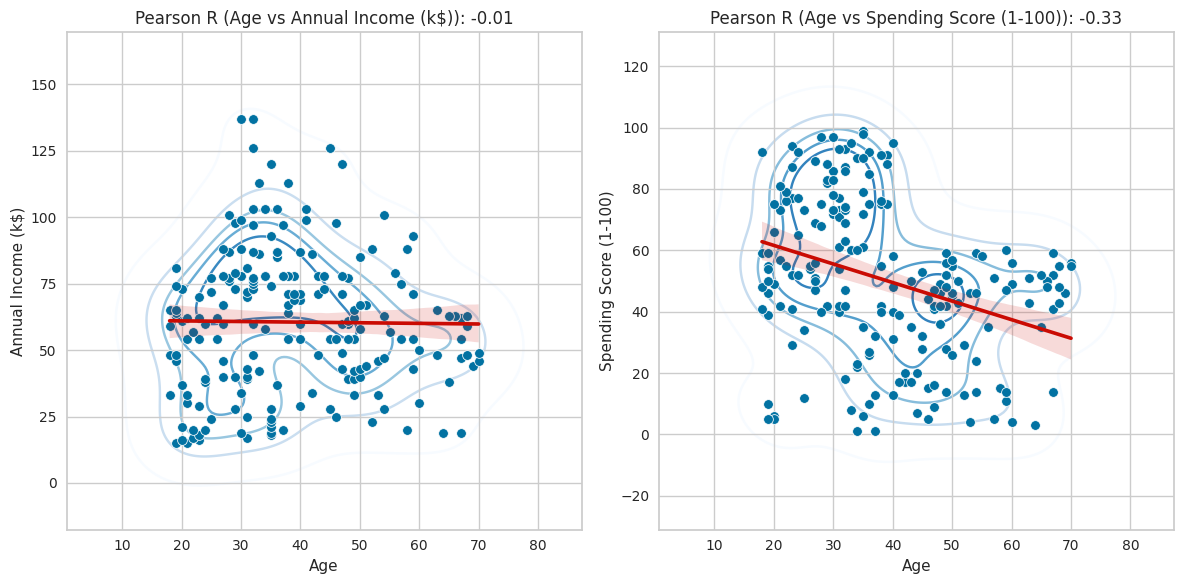

In [ ]:
from scipy.stats import pearsonr

def pearson_plot(df, x: str, y: str, corr_coef, ax):
    # Scatter plot with regression line
    sns.scatterplot(data=df, x=x, y=y, ax=ax)
    sns.regplot(data=df, x=x, y=y, ax=ax, scatter=False, color='r')

    # Add KDE plot
    sns.kdeplot(data=df, x=x, y=y, ax=ax, zorder=0, levels=6, cmap='Blues')

    # Set labels and title
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'Pearson R ({x} vs {y}): {corr_coef:.2f}')

corr_coef_1, p_1 = pearsonr(df["Age"], df["Annual Income (k$)"])
corr_coef_2, p_2 = pearsonr(df["Age"], df["Spending Score (1-100)"])

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot each graph using the modified pearson_plot function
pearson_plot(df, x="Age", y="Annual Income (k$)", corr_coef=corr_coef_1, ax=ax1)
pearson_plot(df, x="Age", y="Spending Score (1-100)", corr_coef=corr_coef_2, ax=ax2)

plt.tight_layout()
plt.show()



a very meagre dependency of income wrt age  but a negative relation between age and spending score

***Income, spending vs Gender***

In [ ]:
male_age= df[df["Gender"]=="Male"]["Age"]
female_age= df[df["Gender"]=="Female"]["Age"]

male_income= df[df["Gender"]=="Male"]["Annual Income (k$)"]
female_income= df[df["Gender"]=="Female"]["Annual Income (k$)"]

male_spending= df[df["Gender"]=="Male"]["Spending Score (1-100)"]
female_spending= df[df["Gender"]=="Female"]["Spending Score (1-100)"]

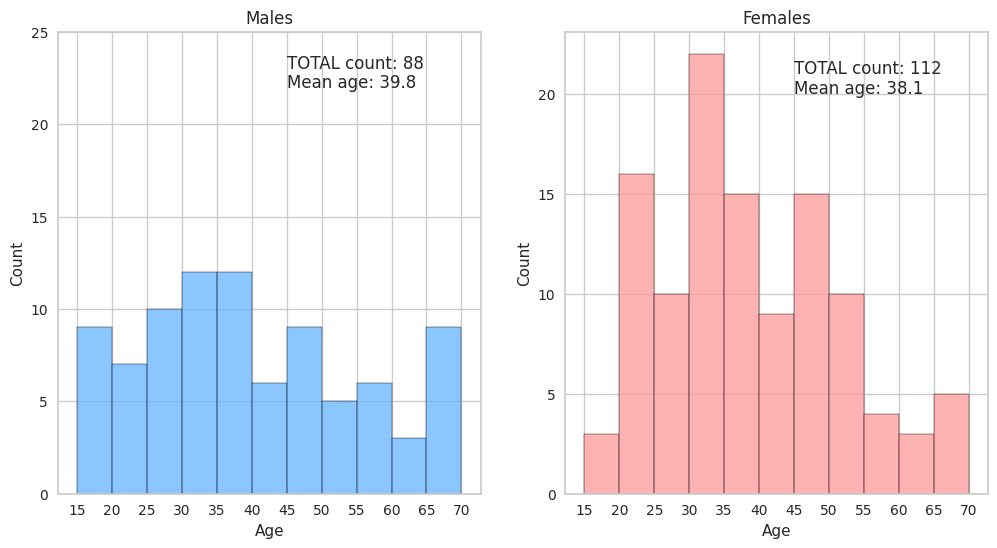

In [ ]:
#age vs gender
age_bins= range(15,75,5)
# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
# Plot for males
sns.histplot(data=male_age, bins=age_bins, kde=False, color='#66b3ff', ax=ax1)
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45, 23, "TOTAL count: {}".format(male_age.count()))
ax1.text(45, 22, "Mean age: {:.1f}".format(male_age.mean()))

# Plot for females
sns.histplot(data=female_age, bins=age_bins, kde=False, color='#ff9999', ax=ax2)
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45, 21, "TOTAL count: {}".format(female_age.count()))
ax2.text(45, 20, "Mean age: {:.1f}".format(female_age.mean()))

plt.show()

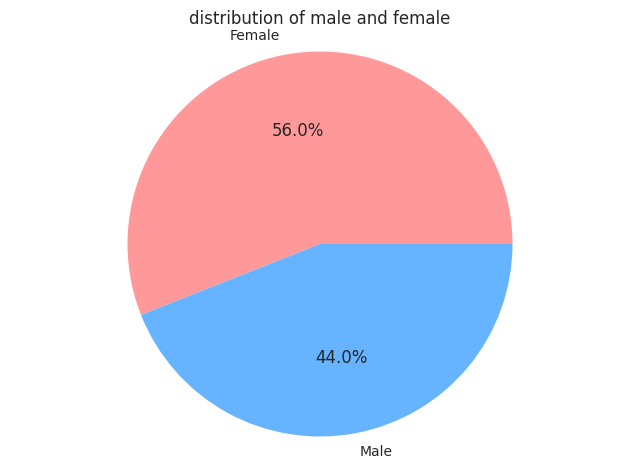

In [ ]:
gender_count= df["Gender"].value_counts()
plt.pie(gender_count,labels=gender_count.index, autopct= "%1.1f%%", startangle= 0, colors= ['#ff9999', '#66b3ff'])
plt.title("distribution of male and female")
plt.axis("equal")
plt.show()

more of women are shopping than male ,so who's earning more and who's spending more?

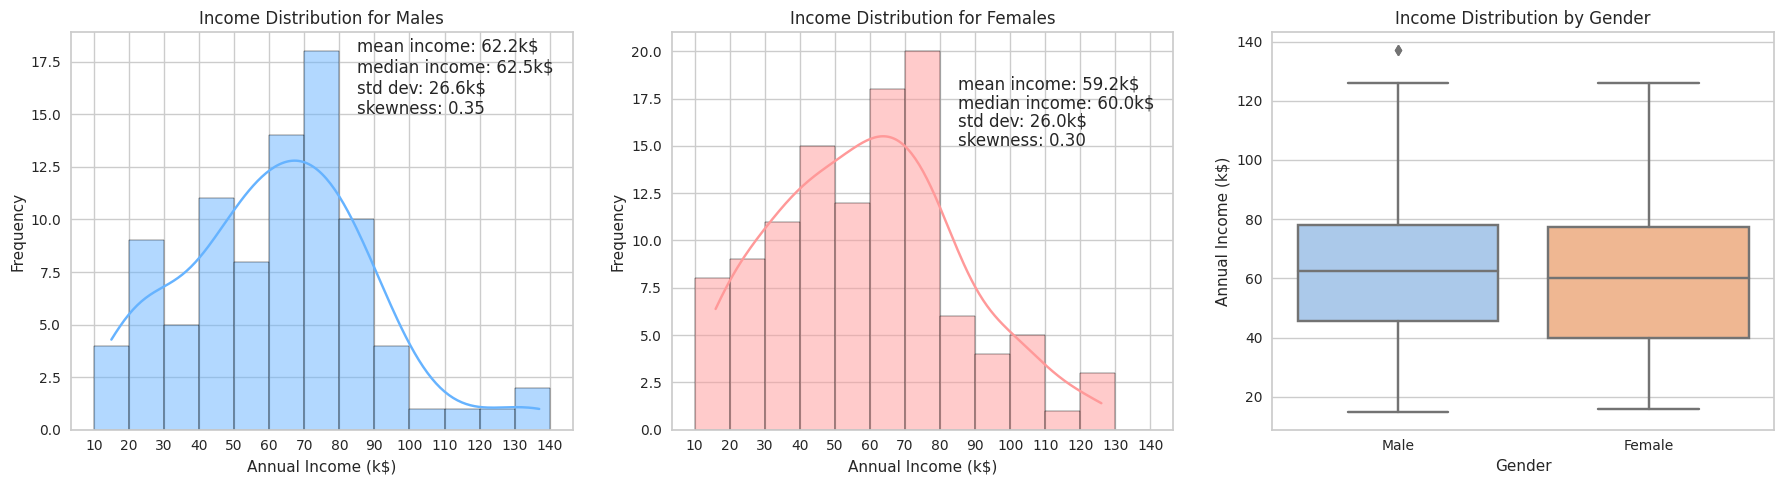

In [ ]:
bins= range(10,150,10)    #15-137

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Bar plot for Male vs Income
sns.histplot(male_income, bins=bins, kde=True, ax=ax1, color= '#66b3ff')
ax1.set_title('Income Distribution for Males')
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Frequency')
ax1.set_xticks(bins)
ax1.text(85, 18, "mean income: {:.1f}k$".format(male_income.mean()))
ax1.text(85, 17, "median income: {:.1f}k$".format(male_income.median()))
ax1.text(85, 16, "std dev: {:.1f}k$".format(male_income.std()))
ax1.text(85, 15, "skewness: {:.2f}".format(male_income.skew()))

# Bar plot for Female vs Income
sns.histplot(female_income, bins=bins, kde=True, ax=ax2, color='#ff9999')
ax2.set_title('Income Distribution for Females')
ax2.set_xlabel('Annual Income (k$)')
ax2.set_ylabel('Frequency')
ax2.set_xticks(bins)
ax2.text(85, 18, "mean income: {:.1f}k$".format(female_income.mean()))
ax2.text(85, 17, "median income: {:.1f}k$".format(female_income.median()))
ax2.text(85, 16, "std dev: {:.1f}k$".format(female_income.std()))
ax2.text(85, 15, "skewness: {:.2f}".format(female_income.skew()))

# Boxplot for both genders with respect to income
sns.boxplot(data=df, x='Gender', y='Annual Income (k$)', ax=ax3, palette='pastel')
ax3.set_title('Income Distribution by Gender')
ax3.set_xlabel('Gender')
ax3.set_ylabel('Annual Income (k$)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
#male and female relation for respective income and spending


P-value_spend:  0.2935 
Fail to reject the null hypothesis: The spending distributions between males and females are not significantly different.


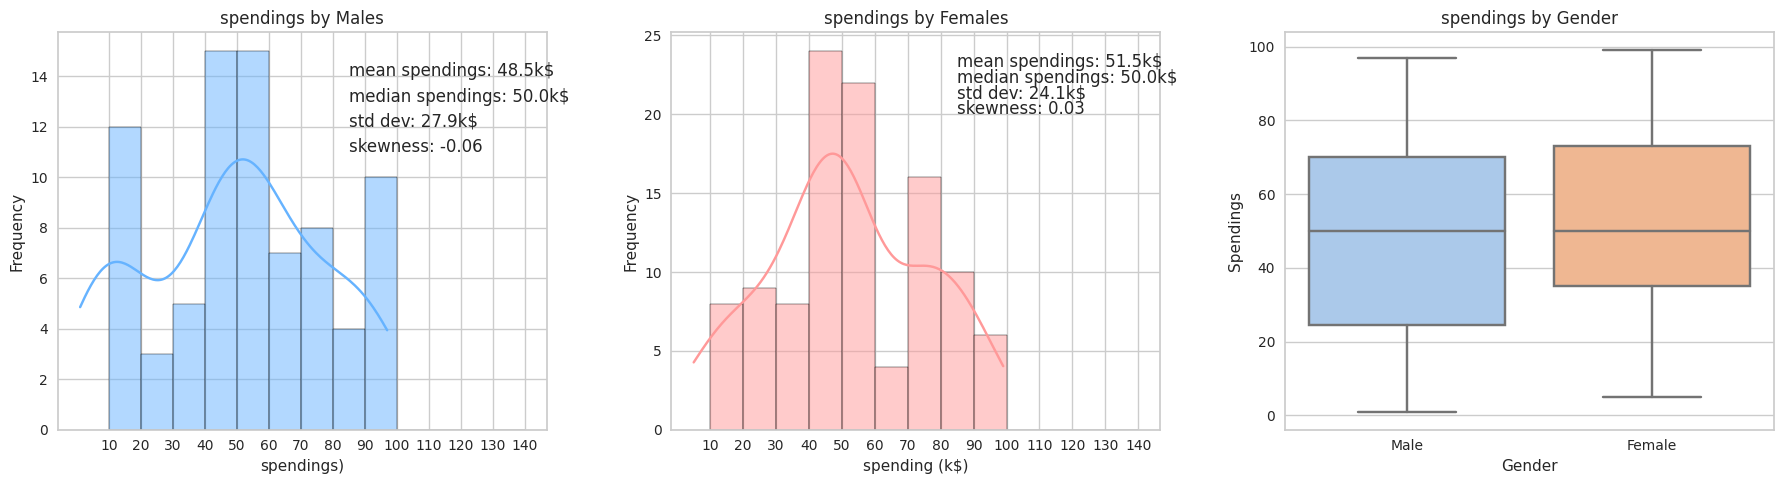

In [ ]:
corr_spen_1, p_spen_1= stats.ks_2samp(male_spending, female_spending)
print(f"P-value_spend: {p_spen_1: .4f} ")
if p_spen_1 < 0.05:
    print("Reject the null hypothesis: The spending distributions between males and females are significantly different.")
else:
    print("Fail to reject the null hypothesis: The spending distributions between males and females are not significantly different.")

fig, (ax4, ax5 ,ax6) = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
# Bar plot for Male vs Income
sns.histplot(male_spending, bins=bins, kde=True, ax=ax4, color= '#66b3ff')
ax4.set_title('spendings by Males')
ax4.set_xlabel('spendings)')
ax4.set_ylabel('Frequency')
ax4.set_xticks(bins)
ax4.text(85, 14, "mean spendings: {:.1f}k$".format(male_spending.mean()))
ax4.text(85, 13, "median spendings: {:.1f}k$".format(male_spending.median()))
ax4.text(85, 12, "std dev: {:.1f}k$".format(male_spending.std()))
ax4.text(85, 11, "skewness: {:.2f}".format(male_spending.skew()))

# Bar plot for Female vs Income
sns.histplot(female_spending, bins=bins, kde=True, ax=ax5, color='#ff9999')
ax5.set_title('spendings by Females')
ax5.set_xlabel('spending (k$)')
ax5.set_ylabel('Frequency')
ax5.set_xticks(bins)
ax5.text(85, 23, "mean spendings: {:.1f}k$".format(female_spending.mean()))
ax5.text(85, 22, "median spendings: {:.1f}k$".format(female_spending.median()))
ax5.text(85, 21, "std dev: {:.1f}k$".format(female_spending.std()))
ax5.text(85, 20, "skewness: {:.2f}".format(female_spending.skew()))

# Boxplot for both genders with respect to income
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', ax=ax6, palette='pastel')
ax6.set_title('spendings by Gender')
ax6.set_xlabel('Gender')
ax6.set_ylabel('Spendings')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



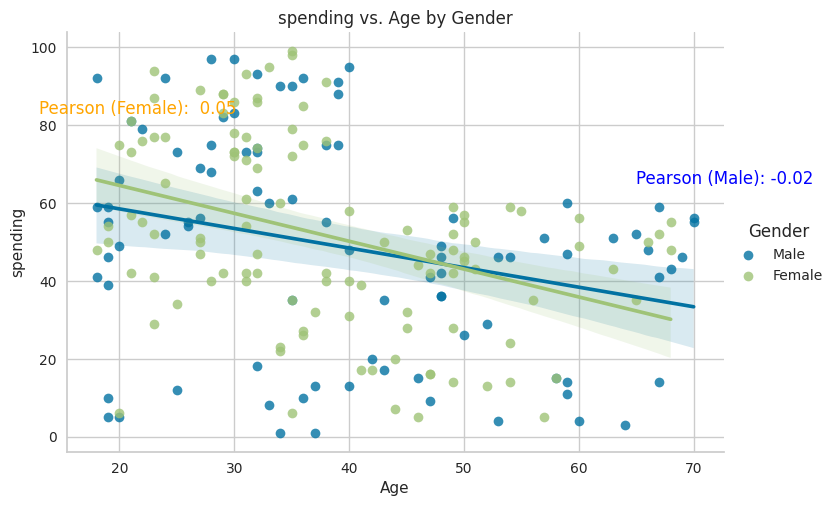

In [ ]:
#age of genders and their spending
corr_1, p_1 = pearsonr(male_age, male_spending )
corr_2, p_2= pearsonr(female_age, female_spending)
g = sns.lmplot(x='Age', y='Spending Score (1-100)', data=df, hue='Gender', aspect=1.5)

# Add annotations for Pearson correlation
plt.text(65,65, f'Pearson (Male): {corr_coefficient_male: .2f}', color='blue',  )
plt.text(13,83, f'Pearson (Female): {corr_coefficient_female: .2f}', color='orange' )

# Customize the plot
plt.title('spending vs. Age by Gender')
plt.xlabel('Age')
plt.ylabel('spending')

# Show the plot
plt.show()

P-value_income:  0.7782 
Fail to reject the null hypothesis: The income distributions between males and females are not significantly different.



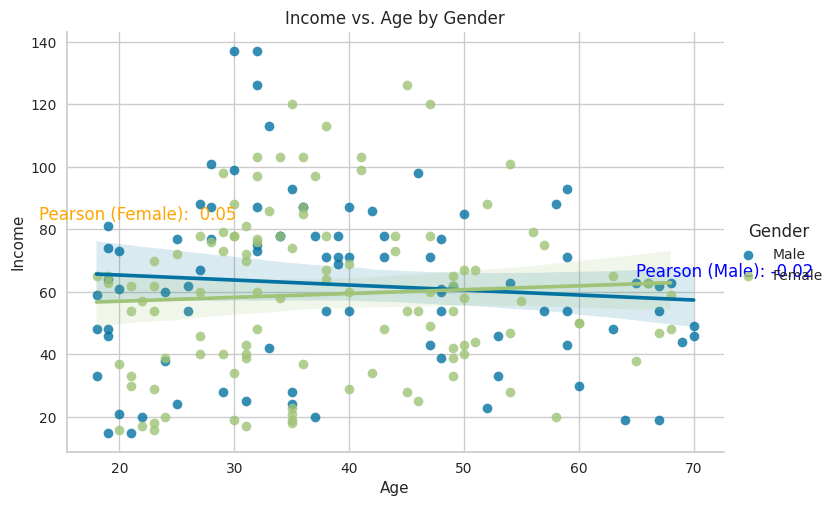

In [ ]:
#age of genders and their income
from scipy import stats
corr_inc_1, p_inc_1 = stats.ks_2samp(male_income, female_income)

print(f"P-value_income: {p_inc_1: .4f} ")
# Interpret results
if p_inc_1 < 0.05:
    print("Reject the null hypothesis: The income distributions between males and females are significantly different.")
else:
    print("Fail to reject the null hypothesis: The income distributions between males and females are not significantly different.")
print()


corr_1, p_1 = pearsonr(male_age, male_income )
corr_2, p_2= pearsonr(female_age, female_income)
g = sns.lmplot(x='Age', y='Annual Income (k$)', data=df, hue='Gender', aspect=1.5)

# Add annotations for Pearson correlation
plt.text(65,65, f'Pearson (Male): {corr_coefficient_male: .2f}', color='blue',  )
plt.text(13,83, f'Pearson (Female): {corr_coefficient_female: .2f}', color='orange' )

# Customize the plot
plt.title('Income vs. Age by Gender')
plt.xlabel('Age')
plt.ylabel('Income')

# Show the plot
plt.show()


the p-values are quite high, suggesting that there is no strong evidence of a significant relationship between income and spending. The null hypothesis that there is no relationship between income and spending cannot be rejected for either gender.

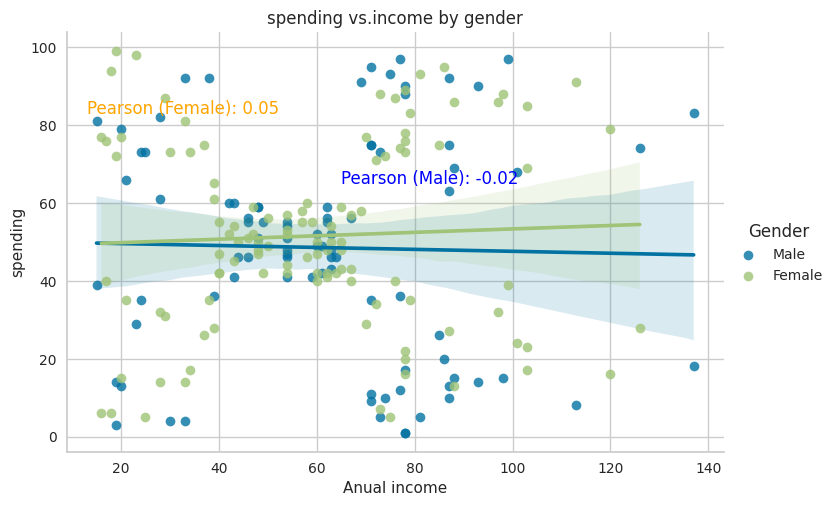

In [ ]:
#income vs spending
corr_coefficient_male, p_value_male = pearsonr(male_income, male_spending)
corr_coefficient_female, p_value_female = pearsonr(female_income, female_spending)

# Create a lmplot
g = sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', aspect=1.5)

# Add annotations for Pearson correlation
plt.text(65,65, f'Pearson (Male): {corr_coefficient_male:.2f}', color='blue',  )
plt.text(13,83, f'Pearson (Female): {corr_coefficient_female:.2f}', color='orange' )

# Customize the plot
plt.title('spending vs.income by gender')
plt.xlabel('Anual income')
plt.ylabel('spending')

# Show the plot
plt.show()

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Age Group'],
      dtype='object')

***Clustering***

**1) kmeans**

**2) hieraichal**

**3) DBSCAN**

In [ ]:
#KMEANS
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
x_cols= df[["Age", 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
x_numerics= x_cols.iloc[:, 1:3].values

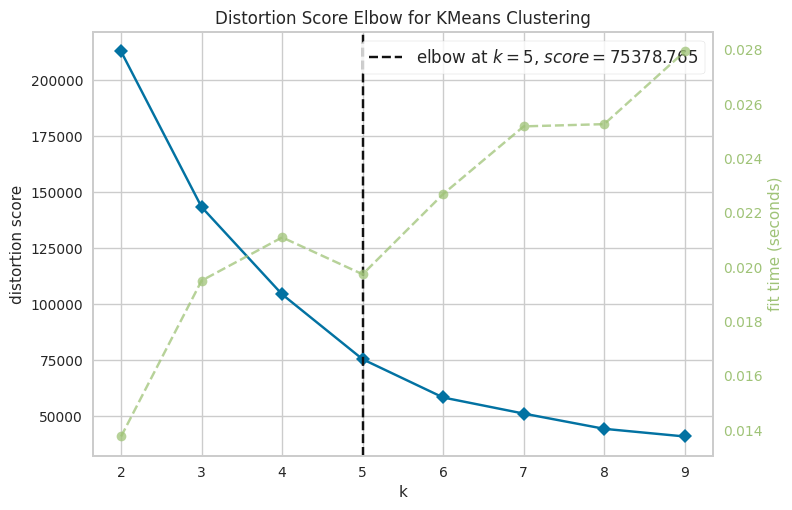

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#elbow method for k
model= KMeans(random_state= 42)
visualizer= KElbowVisualizer(model, k= (2,10))
visualizer.fit(x_cols)
visualizer.show()

In [ ]:
KM_5_clusters = KMeans(n_clusters=5).fit(x_cols) # initialise and fit K-Means model

KM5_clustered = x_cols.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points
KM5_clustered


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,4
1,21,15,81,1
2,20,16,6,4
3,23,16,77,1
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


In [ ]:
KM_5_clusters.cluster_centers_[:,0]

array([43.08860759, 25.52173913, 32.69230769, 40.66666667, 45.2173913 ])

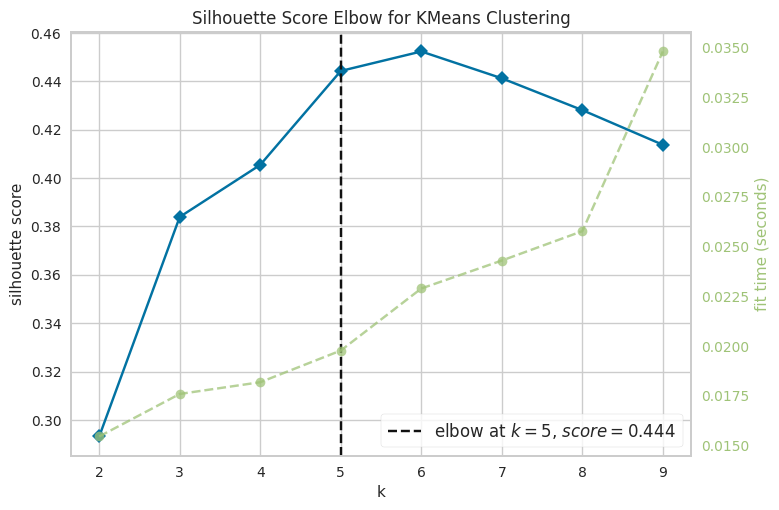

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(x_cols)
visualizer.show()
plt.show()

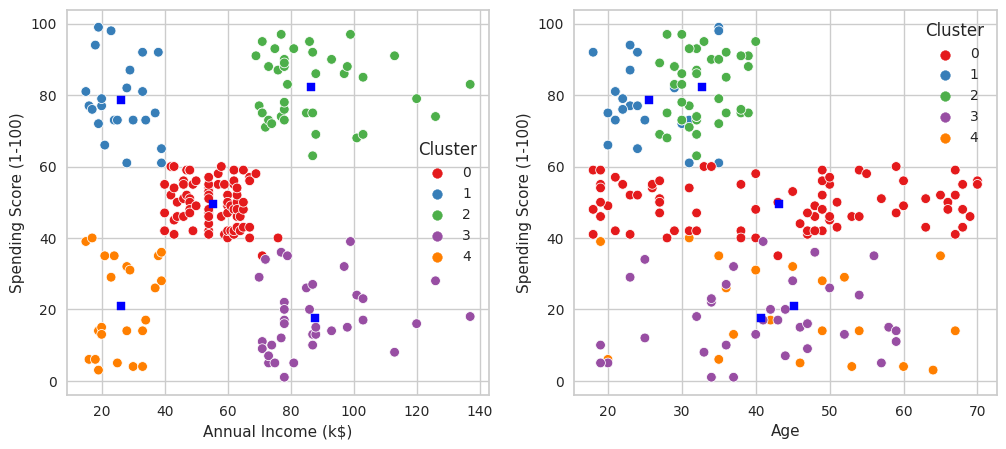

In [ ]:
fig1, (axes) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for 'Annual Income (k$)' vs 'Spending Score (1-100)'
scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                         data=KM5_clustered, hue='Cluster', ax=axes[0], palette='Set1', legend='full')

# Scatter plot for 'Age' vs 'Spending Score (1-100)'
sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=KM5_clustered, hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# Adding cluster centers (for the first scatter plot)
axes[0].scatter(x= KM_5_clusters.cluster_centers_[:,1], y= KM_5_clusters.cluster_centers_[:,2],
                marker='s', s=40, c="blue")

# Adding cluster centers (for the second scatter plot)
axes[1].scatter(x= KM_5_clusters.cluster_centers_[:,0], y= KM_5_clusters.cluster_centers_[:,2],
                marker='s', s=40, c="blue")

# Show the plots
plt.show()


Interpretation of Silhouette Score:
Close to 1: Indicates that data points are well separated from other clusters and are tightly packed within their own cluster. Good clustering.
Close to 0: The data points are very close to the boundary between two clusters. Not ideal, but may still be acceptable.
Negative values: Indicates that data points are likely assigned to the wrong clusters.
Use in Practice:
The silhouette score is commonly used in clustering validation to compare different numbers of clusters (e.g., in KMeans, the "elbow method" is used to find the optimal number of clusters). A high silhouette score suggests that the chosen number of clusters is appropriate.

In [ ]:
#dbscan
from sklearn.cluster import DBSCAN
from itertools import product
eps_val= np.arange(8,12.75,0.25)
min_samples= np.arange(3,10)

dbscan_params= list(product(eps_val, min_samples))

In [ ]:
#to find silhoutte score for samples and eps
from sklearn.metrics import silhouette_score
#to visualize score for every posibility in dbscan_params

no_of_clusters= []
sil_score= []
for p in dbscan_params:
    dbs_clstr_temp= DBSCAN(eps= p[0], min_samples= p[1]).fit(x_cols)
    no_of_clusters.append(len(np.unique(dbs_clstr_temp.labels_)))
    sil_score.append(silhouette_score(x_cols, dbs_clstr_temp.labels_ ))

In [ ]:
silhouette_score(x_cols, dbs_clstr_temp.labels_ )

0.1800826997804269

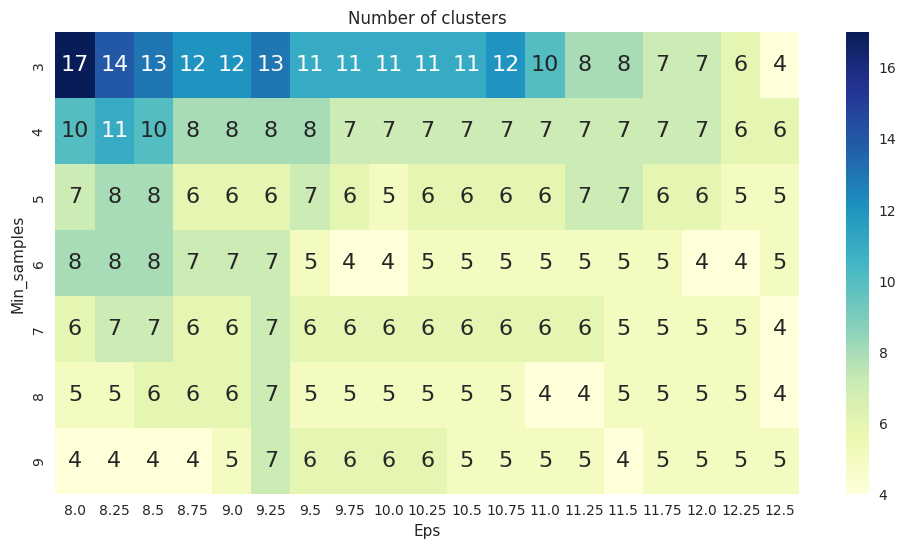

In [ ]:
#wrt no. of clusterings formed from every eps and min samples possibility
tmp= pd.DataFrame.from_records(dbscan_params, columns =['Eps', 'Min_samples'])
tmp["no of clusters"]= no_of_clusters

pivot_1= pd.pivot_table(tmp, values='no of clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

The heatplot above shows, the number of clusters vary from 17 to 4. However, most of the combinations gives 4-7 clusters. To decide which combination to choose I will use a metric - a silhuette score and I will plot it as a heatmap again.

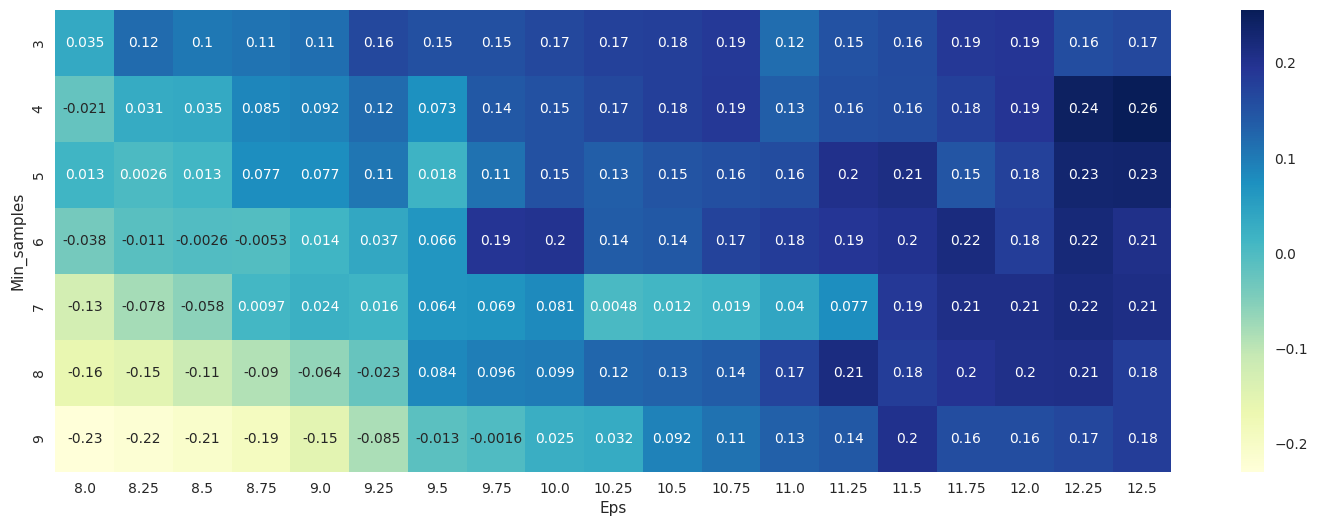

In [ ]:
#wrt silhouette score from every possibilty of dbscan
tmp = pd.DataFrame.from_records(dbscan_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.26 for eps=12.5 and min_samples=4.

In [ ]:
temp_clstr_1= DBSCAN(eps=13, min_samples=4).fit(x_cols)  # default will give -1 outlier only so check


In [ ]:
DBSCAN_clustered = x_cols.copy()
DBSCAN_clustered.loc[:,'Cluster'] = temp_clstr_1.labels_ # append labels to points
DBSCAN_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,-1
196,45,126,28,-1
197,32,126,74,-1
198,32,137,18,-1


In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,17
0,137
1,8
2,34
3,4


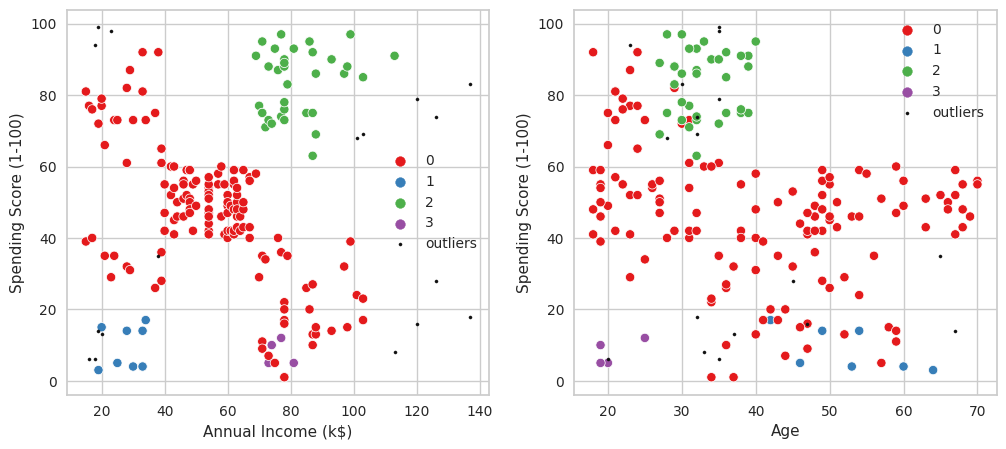

In [ ]:
# Extract outliers based on DBSCAN clustering where Cluster is -1
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]

# Create a figure with 2 subplots
fig2, (axes) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for 'Annual Income (k$)' vs 'Spending Score (1-100)' (excluding outliers)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

# Scatter plot for 'Age' vs 'Spending Score (1-100)' (excluding outliers)
sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

# Adding outliers to the first scatter plot
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'],
                s=5, label='outliers', c="k")

# Adding outliers to the second scatter plot
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'],
                s=5, label='outliers', c="k")

# Add legends for both plots
axes[0].legend()
axes[1].legend()

# Set font size for legend texts
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

# Display the plot
plt.show()


ssomewhat cluttery by dbscan , lets see of kmeans and heirarichal clustering

In [ ]:
def elbowoptimizer(data):
    inertia = []
    k_range = range(1, 11)  # Check for 1 to 10 clusters

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, inertia, marker='o', linestyle='--')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

In [ ]:
def kmeanstransform(k, data):
    kmeans= KMeans(n_clusters=k)
    labels= kmeans.fit_predict(data)
    return kmeans, labels

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

def dendoOptimizer(data):
    """Plots a Dendogram Plot on the data provided"""
    sch.dendrogram(sch.linkage(data, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()

def heirarchicalTrainer(noOfClusters, data):
    """
    Trains Agglomerative Clustering Algorithm on data with
    number of clusters provided and Returns corresponding Model and Labels
    """
    hc = AgglomerativeClustering(
        n_clusters=noOfClusters, affinity='euclidean', linkage='ward')
    hc_labels = hc.fit_predict(data)
    return (hc, hc_labels)

In [ ]:
def clustervisualizer(data, model, k, labels, xlabel, ylabel, model_type):
    colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'purple']

    # Plot each cluster with a different color
    for i in range(0, k):
        plt.scatter(data[labels == i, 0], data[labels == i, 1],
                    c=colors[i], label="Cluster " + str(i+1))

    # If the model is KMeans, plot the centroids
    if model_type == 'KMeans Clustering':
        plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
                    s=100, c='yellow', label='Centroids')

    # Set the title and labels
    plt.title('Clusters of customers using ' + model_type)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [ ]:
print(x_cols.columns)


Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [ ]:
x_numerics= x_cols.iloc[:, 1:3].values

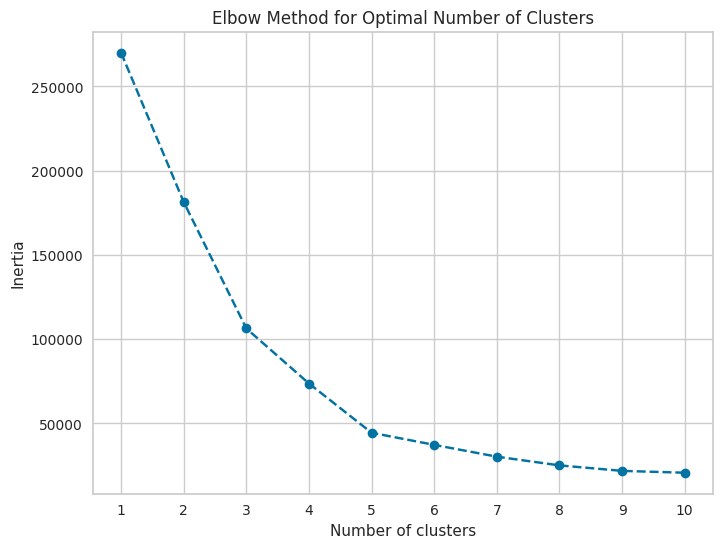

200

In [ ]:
elbowoptimizer(x_numerics)
len(kmeanstransform(5, x_numerics)[1]) #giving labels for all datasets in range of no. of clusters

In [ ]:
 kmeans, labels= kmeanstransform(5, x_numerics)

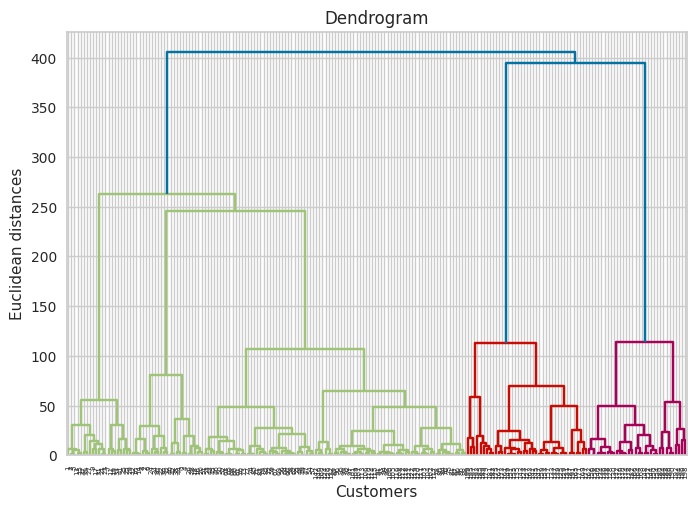

In [ ]:
dendoOptimizer(x_numerics)

In [ ]:
hc, hc_labels= heirarchicalTrainer(5, x_numerics)

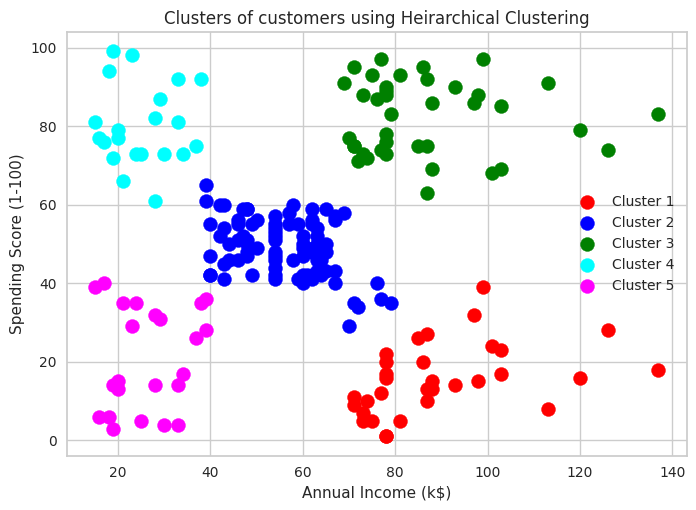

In [ ]:
clusterVisualiser(x_numerics, hc, 5, hc_labels,
                  'Annual Income (k$)', 'Spending Score (1-100)', 'Heirarchical Clustering')

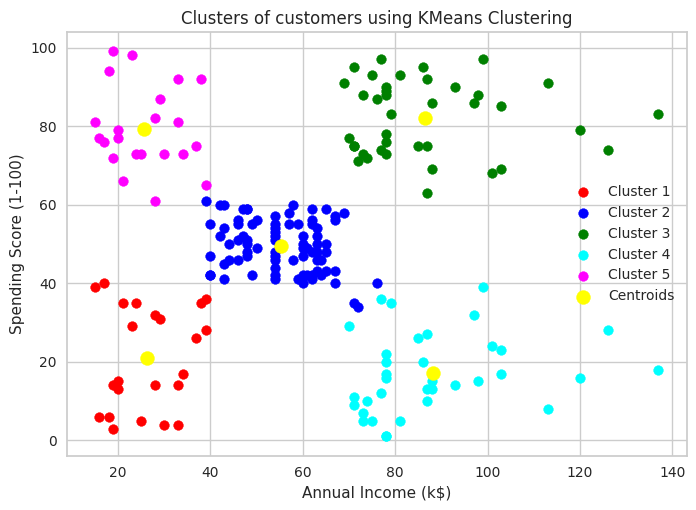

In [ ]:
clustervisualizer(x_numerics, model=kmeans, k=5, labels=labels, xlabel="Annual Income (k$)", ylabel="Spending Score (1-100)", model_type="KMeans Clustering")

kmeans and heirarical were better visualizer than dbscan in this case